In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# 设置单元格所有行全部输出模式
from IPython.core.interactiveshell import InteractiveShell

# 设置InteractiveShell对象的ast_node_interactivity的值为all，即表示每一个单元格所有有输出的代码行全部需要输出
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
!pip install missingno seaborn

Looking in indexes: http://repo.myhuaweicloud.com/repository/pypi/simple
You should consider upgrading via the '/home/ma-user/anaconda3/envs/PyTorch-2.0.0/bin/python -m pip install --upgrade pip' command.


In [3]:
import seaborn as sns
import missingno as sns
from utils.utils import *

In [4]:
# 通过pandas的read_csv加载数据
df = pd.read_csv('./data/loan_data.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,LP002953,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y
377,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
378,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
379,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y


In [5]:
# 初步的数据预处理：删除主键索引、唯一索引字段
df = df.drop(['Loan_ID'],axis=1) # 约定：哪怕是只删除一列，最好也是放在一个数组中来指定这个列的列索引名

In [6]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
376,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y
377,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
378,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
379,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y


In [7]:
# 分开不同的特征，进行单独的缺失值处理了
num_features = ['ApplicantIncome','CoapplicantIncome','LoanAmount']
class_features = list(df.columns[:-1].drop(num_features))

对于当前数据集，总计：381行，8列
开始绘制缺失值分布直方图...


,data types,isMissing,missing counts,missing rate,min,max,25%,50%,75%,mean,std
Gender,object,True,5,1.312336,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Married,object,False,0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,object,True,8,2.099738,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,object,False,0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Self_Employed,object,True,21,5.511811,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Loan_Amount_Term,float64,True,11,2.887139,12.0,480.0,360.0,360.0,360.0,340.864865,68.549257
Credit_History,float64,True,30,7.874016,0.0,1.0,1.0,1.0,1.0,0.837607,0.369338
Property_Area,object,False,0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


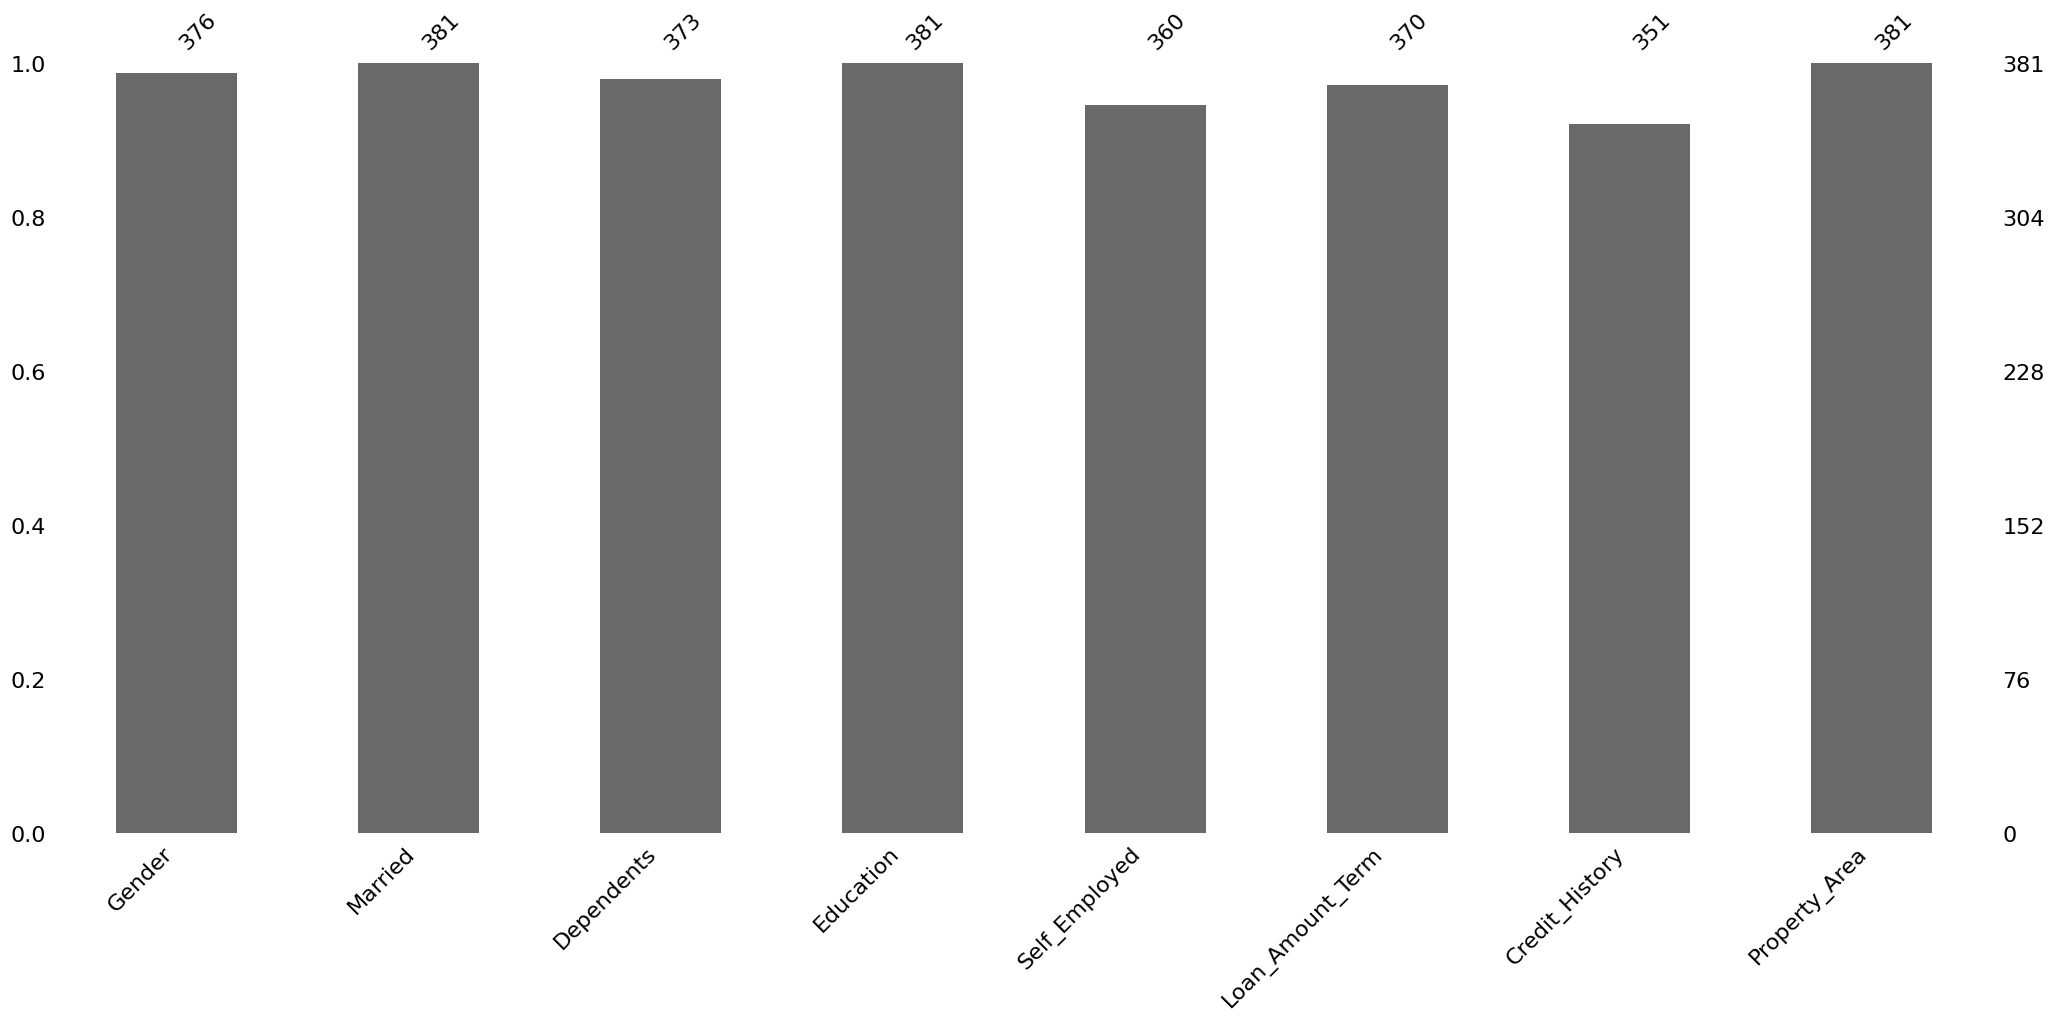

In [8]:
# 1.对于类别型特征，检测其缺失值
check_missing_value(df[class_features])

对于当前数据集，总计：381行，8列
开始绘制缺失值分布直方图...


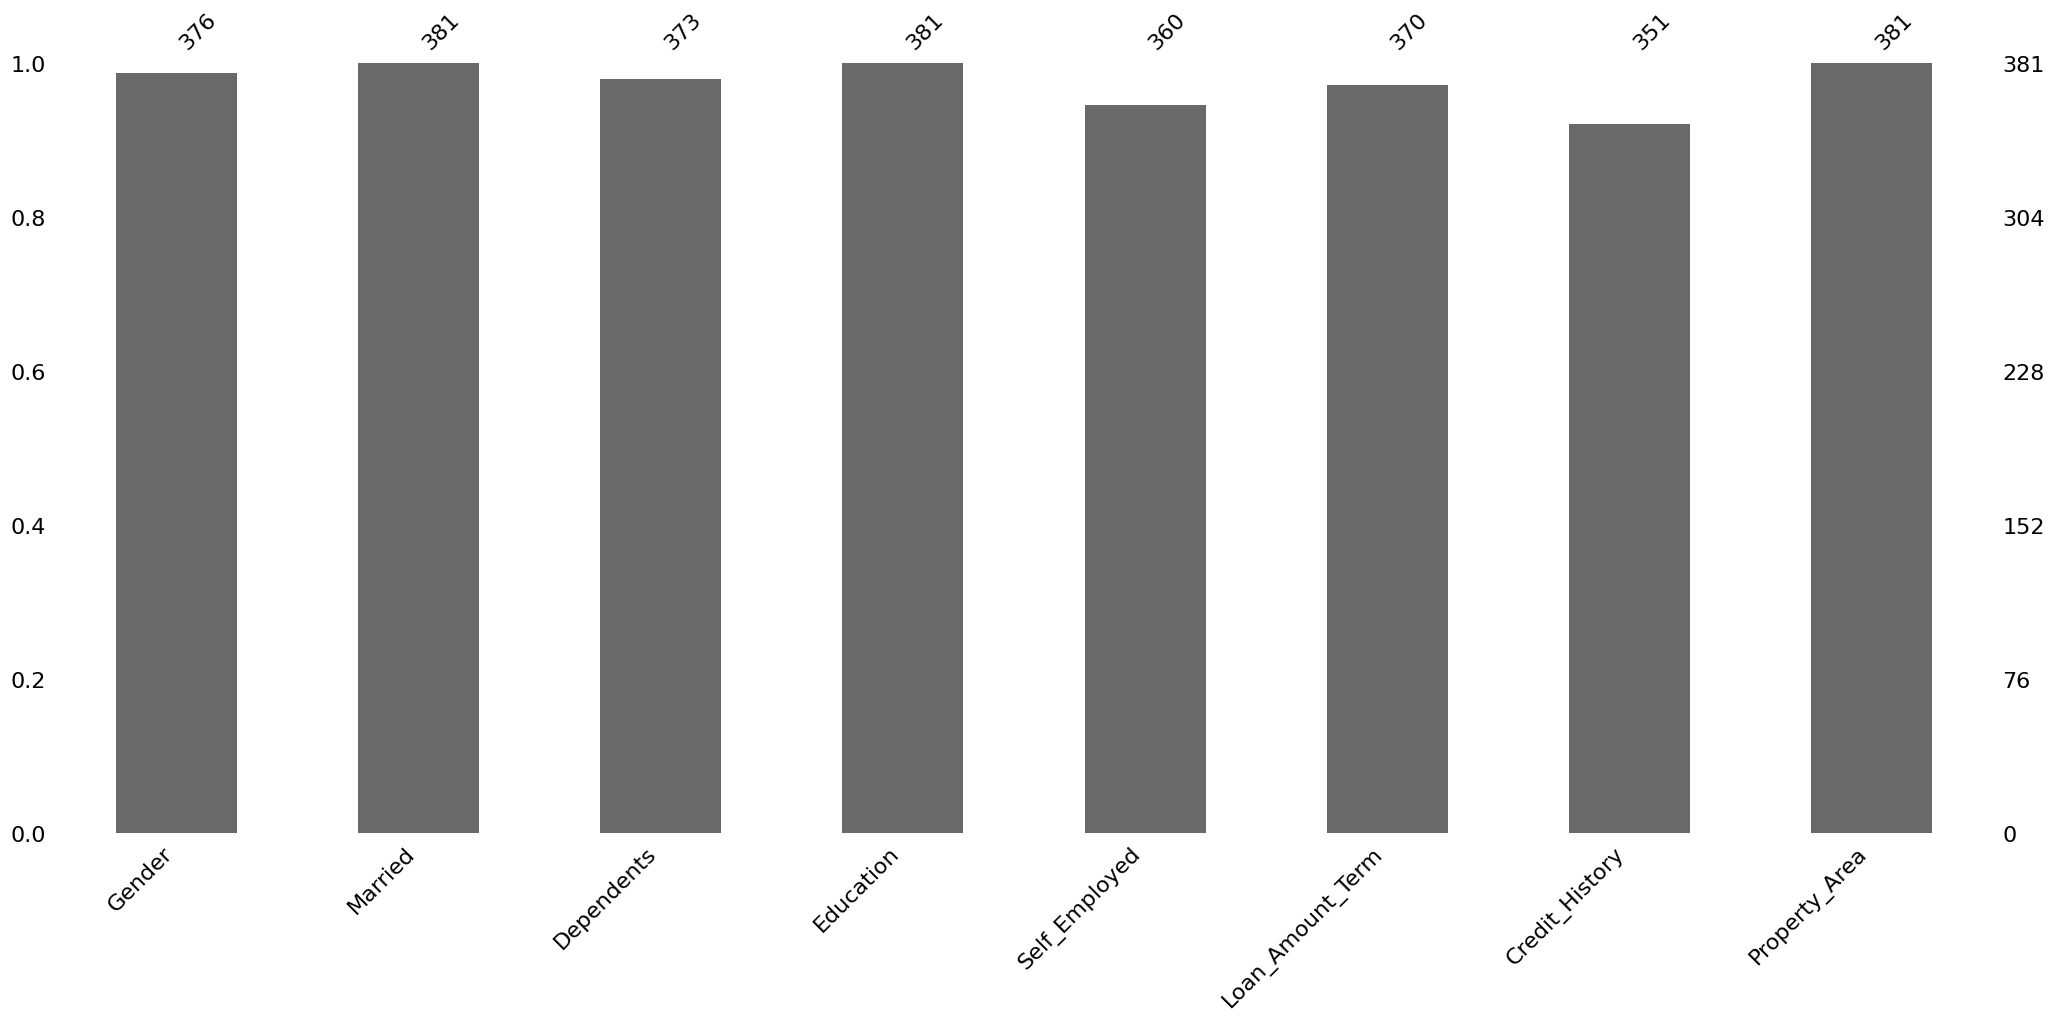

In [9]:
# 2.针对所有类别型特征，将检测出具有缺失值的特征过滤出来
res_df = check_missing_value(df[class_features])

In [10]:
# 过滤出类别型特征中具有缺失值的特征列
classes_missing_feature = list(res_df[res_df['missing counts'] != 0].index)
classes_missing_feature

['Gender', 'Dependents', 'Self_Employed', 'Loan_Amount_Term', 'Credit_History']

In [11]:
# 使用众数对类别型特征完成缺失值填充
df[classes_missing_feature] = pd.DataFrame(
    data=missingFillna(df[classes_missing_feature],fill_type='classes'),
    columns=classes_missing_feature
)

对于当前数据集，总计：381行，12列
开始绘制缺失值分布直方图...


,data types,isMissing,missing counts,missing rate,min,max,25%,50%,75%,mean,std
Gender,object,False,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Married,object,False,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,object,False,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,object,False,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Self_Employed,object,False,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ApplicantIncome,int64,False,0,0.0,150.0,9703.0,2600.0,3333.0,4288.0,3579.845144,1419.813818
CoapplicantIncome,float64,False,0,0.0,0.0,33837.0,0.0,983.0,2016.0,1277.275381,2340.818114
LoanAmount,float64,False,0,0.0,9.0,150.0,90.0,110.0,127.0,104.986877,28.358464
Loan_Amount_Term,object,False,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Credit_History,object,False,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


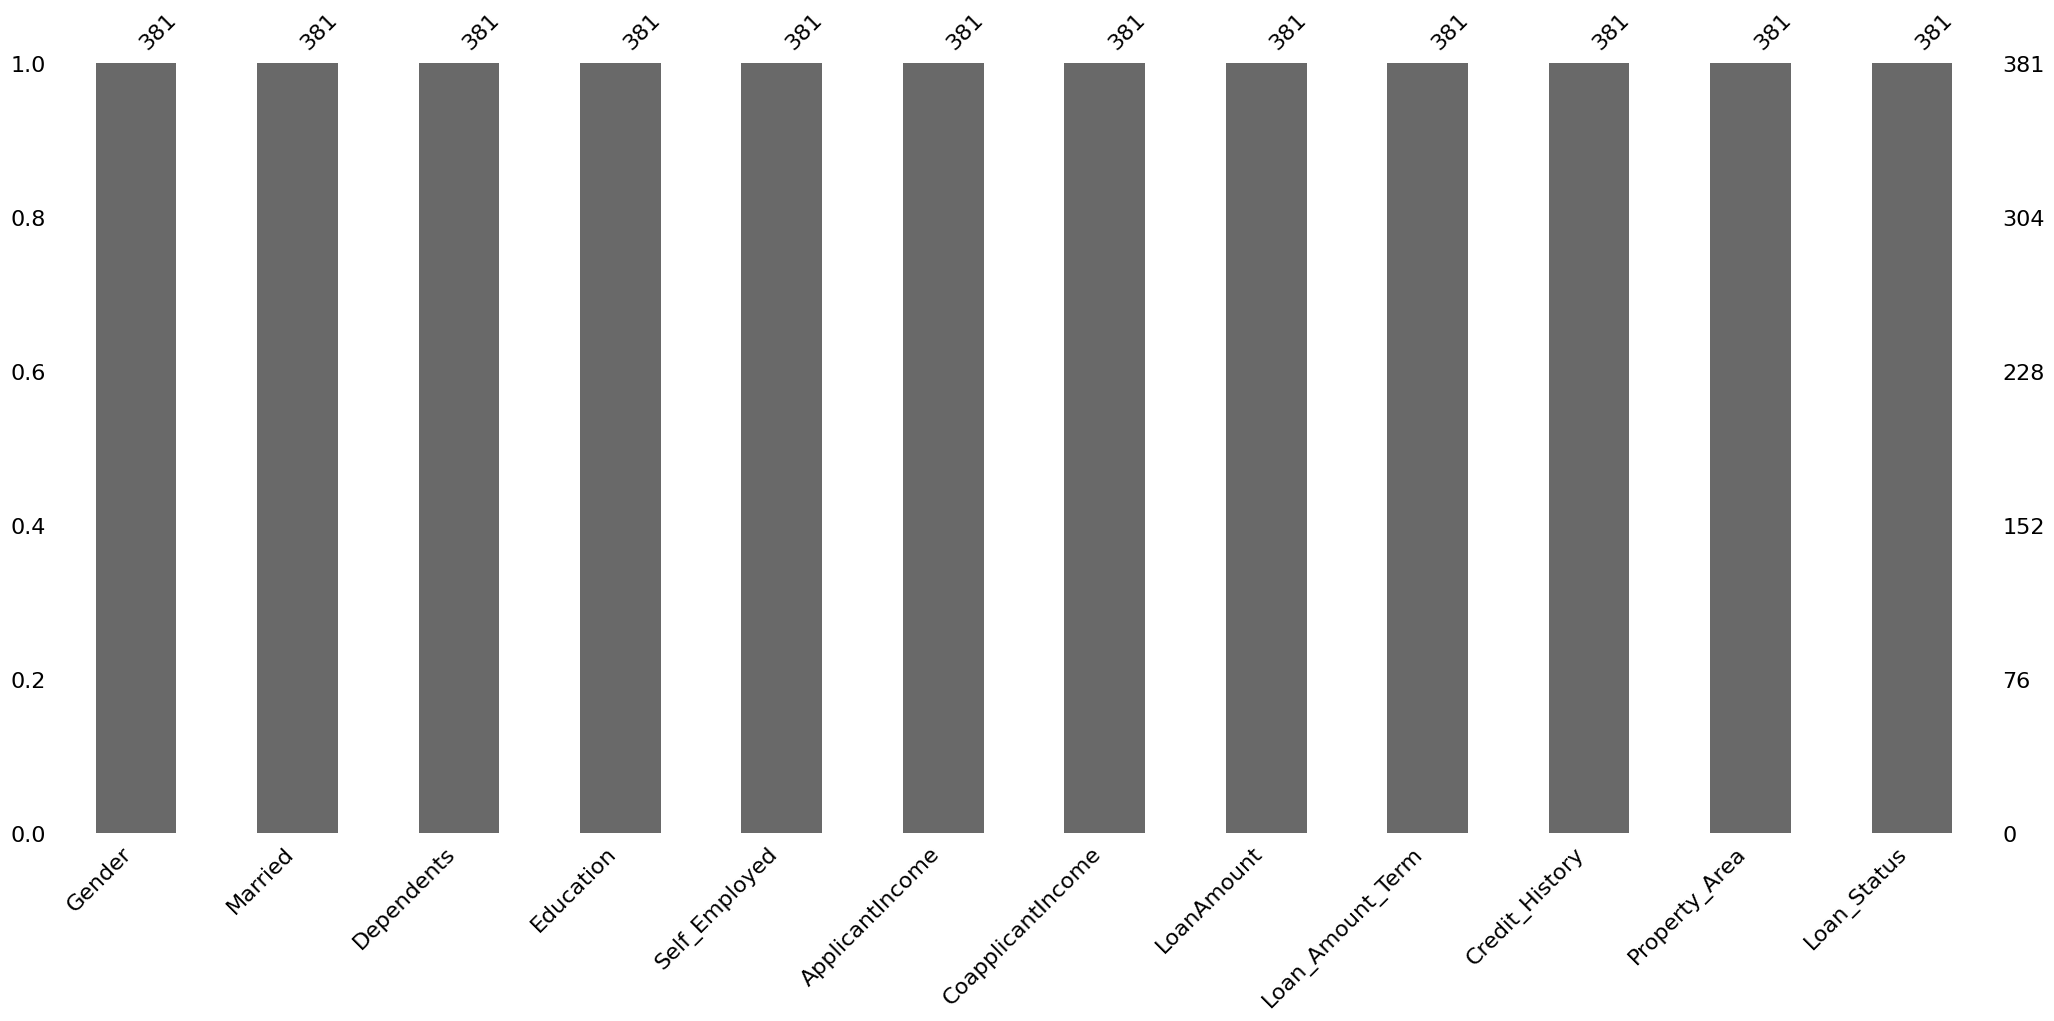

In [12]:
# 检测
check_missing_value(df)

In [13]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
376,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y
377,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
378,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
379,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y


In [14]:
# 再对三个数值型特征处理异常值
df[num_features] = check_and_replace_except_value(df[num_features])

特征列：ApplicantIncome，检测到了一个异常值：7660
特征列：ApplicantIncome，检测到了一个异常值：7100
特征列：ApplicantIncome，检测到了一个异常值：7333
特征列：ApplicantIncome，检测到了一个异常值：9323
特征列：ApplicantIncome，检测到了一个异常值：9703
特征列：ApplicantIncome，检测到了一个异常值：7200
特征列：ApplicantIncome，检测到了一个异常值：6822
特征列：ApplicantIncome，检测到了一个异常值：8750
特征列：ApplicantIncome，检测到了一个异常值：7167
特征列：ApplicantIncome，检测到了一个异常值：7250
特征列：ApplicantIncome，检测到了一个异常值：8624
特征列：ApplicantIncome，检测到了一个异常值：7142
特征列：ApplicantIncome，检测到了一个异常值：7085
特征列：ApplicantIncome，检测到了一个异常值：7740

特征列：CoapplicantIncome，检测到了一个异常值：8980.0
特征列：CoapplicantIncome，检测到了一个异常值：5063.0
特征列：CoapplicantIncome，检测到了一个异常值：20000.0
特征列：CoapplicantIncome，检测到了一个异常值：5302.0
特征列：CoapplicantIncome，检测到了一个异常值：6666.0
特征列：CoapplicantIncome，检测到了一个异常值：33837.0

特征列：LoanAmount，检测到了一个异常值：17.0
特征列：LoanAmount，检测到了一个异常值：25.0
特征列：LoanAmount，检测到了一个异常值：25.0
特征列：LoanAmount，检测到了一个异常值：30.0
特征列：LoanAmount，检测到了一个异常值：30.0
特征列：LoanAmount，检测到了一个异常值：26.0
特征列：LoanAmount，检测到了一个异常值：9.0



/home/ma-user/work/utils/utils.py:197: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].replace(value,desc['50%'])
/home/ma-user/work/utils/utils.py:197: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].replace(value,desc['50%'])
/home/ma-user/work/utils/utils.py:197: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

In [15]:
# 这是一个阶段性版本的数据集：缺失值已填充、异常值已替换
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             381 non-null    object 
 1   Married            381 non-null    object 
 2   Dependents         381 non-null    object 
 3   Education          381 non-null    object 
 4   Self_Employed      381 non-null    object 
 5   ApplicantIncome    381 non-null    int64  
 6   CoapplicantIncome  381 non-null    float64
 7   LoanAmount         381 non-null    float64
 8   Loan_Amount_Term   381 non-null    object 
 9   Credit_History     381 non-null    object 
 10  Property_Area      381 non-null    object 
 11  Loan_Status        381 non-null    object 
dtypes: float64(2), int64(1), object(9)
memory usage: 35.8+ KB


In [16]:
# 举例：对当前数据集的标签列做独热编码
df = pd.get_dummies(df,columns=['Loan_Status'])
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status_N,Loan_Status_Y
0,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,1,0
1,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,0,1
2,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,0,1
3,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,0,1
4,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,0,1
377,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,0,1
378,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,0,1
379,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,0,1


In [16]:
# 独热编码的第二种实现方法

# 导包
from sklearn.preprocessing import OneHotEncoder

# OneHotEncoder独热编码完成后，返回的矩阵matrix转换为数组，赋值列索引名称后转换为dataframe
tmp = pd.DataFrame(OneHotEncoder().fit_transform(df[['Loan_Status']]).toarray(),columns=['Loan_Status-N','Loan_Status-Y'])

# 修改类型由原本的float转换为int
tmp = tmp.astype(int)

df = df.drop(['Loan_Status'],axis=1)

In [17]:
df = pd.concat([df,tmp],axis=1)

In [18]:
df['Education'].value_counts()

Graduate        278
Not Graduate    103
Name: Education, dtype: int64

In [19]:
# 测试：对Education特征列做标签编码
df['Education'].value_counts()

Graduate        278
Not Graduate    103
Name: Education, dtype: int64

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
df['Education'] = pd.DataFrame(data=LabelEncoder().fit_transform(df['Education']))


In [22]:
df['Education'].value_counts()

0    278
1    103
Name: Education, dtype: int64

In [23]:
# 测试：对Property_Area做序列化编码
df['Property_Area'].value_counts()

Semiurban    149
Urban        126
Rural        106
Name: Property_Area, dtype: int64

In [24]:
df['Property_Area'] = df['Property_Area'].map({
    'Semiurban':1,
    'Urban':2,
    'Rural':3
})
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status-N,Loan_Status-Y
0,Male,Yes,1,0,No,4583,1508.0,128.0,360.0,1.0,3,1,0
1,Male,Yes,0,0,Yes,3000,0.0,66.0,360.0,1.0,2,0,1
2,Male,Yes,0,1,No,2583,2358.0,120.0,360.0,1.0,2,0,1
3,Male,No,0,0,No,6000,0.0,141.0,360.0,1.0,2,0,1
4,Male,Yes,0,1,No,2333,1516.0,95.0,360.0,1.0,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,Male,Yes,3+,0,No,5703,0.0,128.0,360.0,1.0,2,0,1
377,Male,Yes,0,0,No,3232,1950.0,108.0,360.0,1.0,3,0,1
378,Female,No,0,0,No,2900,0.0,71.0,360.0,1.0,3,0,1
379,Male,Yes,3+,0,No,4106,0.0,40.0,180.0,1.0,3,0,1


In [16]:
# 这是一个阶段性版本的数据集：缺失值已填充、异常值已替换、标签已完成独热编码、特征已完成标签编码
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             381 non-null    object 
 1   Married            381 non-null    object 
 2   Dependents         381 non-null    object 
 3   Education          381 non-null    object 
 4   Self_Employed      381 non-null    object 
 5   ApplicantIncome    381 non-null    int64  
 6   CoapplicantIncome  381 non-null    float64
 7   LoanAmount         381 non-null    float64
 8   Loan_Amount_Term   381 non-null    object 
 9   Credit_History     381 non-null    object 
 10  Property_Area      381 non-null    object 
 11  Loan_Status        381 non-null    object 
dtypes: float64(2), int64(1), object(9)
memory usage: 35.8+ KB


In [17]:
# 策略：object类型特征全部做标签编码 - 标签做独热编码

# 先处理所有类别型特征的标签编码
for col in class_features:
    df[col] = encoder_feature(df[col])


In [18]:
# 最后处理标签的独热编码
tmp = pd.DataFrame(
    data=encoder_feature(df[['Loan_Status']],method='onehotencoder'),
    columns=['Loan_Status-N','Loan_Status-Y']
)
tmp = tmp.astype(int)

df = pd.concat([df,tmp],axis=1)
df = df.drop('Loan_Status',axis=1)

In [19]:
# 这是一个阶段性版本的数据集：缺失值已填充、异常值已替换、标签已完成独热编码、特征已完成标签编码
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             381 non-null    int64  
 1   Married            381 non-null    int64  
 2   Dependents         381 non-null    int64  
 3   Education          381 non-null    int64  
 4   Self_Employed      381 non-null    int64  
 5   ApplicantIncome    381 non-null    int64  
 6   CoapplicantIncome  381 non-null    float64
 7   LoanAmount         381 non-null    float64
 8   Loan_Amount_Term   381 non-null    int64  
 9   Credit_History     381 non-null    int64  
 10  Property_Area      381 non-null    int64  
 11  Loan_Status-N      381 non-null    int64  
 12  Loan_Status-Y      381 non-null    int64  
dtypes: float64(2), int64(11)
memory usage: 38.8 KB


In [20]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status-N,Loan_Status-Y
0,1,1,1,0,0,4583,1508.0,128.0,8,1,0,1,0
1,1,1,0,0,1,3000,0.0,66.0,8,1,2,0,1
2,1,1,0,1,0,2583,2358.0,120.0,8,1,2,0,1
3,1,0,0,0,0,6000,0.0,141.0,8,1,2,0,1
4,1,1,0,1,0,2333,1516.0,95.0,8,1,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,1,1,3,0,0,5703,0.0,128.0,8,1,2,0,1
377,1,1,0,0,0,3232,1950.0,108.0,8,1,0,0,1
378,0,0,0,0,0,2900,0.0,71.0,8,1,0,0,1
379,1,1,3,0,0,4106,0.0,40.0,5,1,0,0,1


当前数据集中所有的列为：['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
当前数据集中，列的数量为：3
当前构造的多图布局的形状为：(1, 3)
***当前获取到了第1个列，其名称为：ApplicantIncome
***当前列：ApplicantIncome要绘制的多图布局子区域的位置为：(0, 0)
***当前获取到了第2个列，其名称为：CoapplicantIncome
***当前列：CoapplicantIncome要绘制的多图布局子区域的位置为：(0, 1)
***当前获取到了第3个列，其名称为：LoanAmount
***当前列：LoanAmount要绘制的多图布局子区域的位置为：(0, 2)


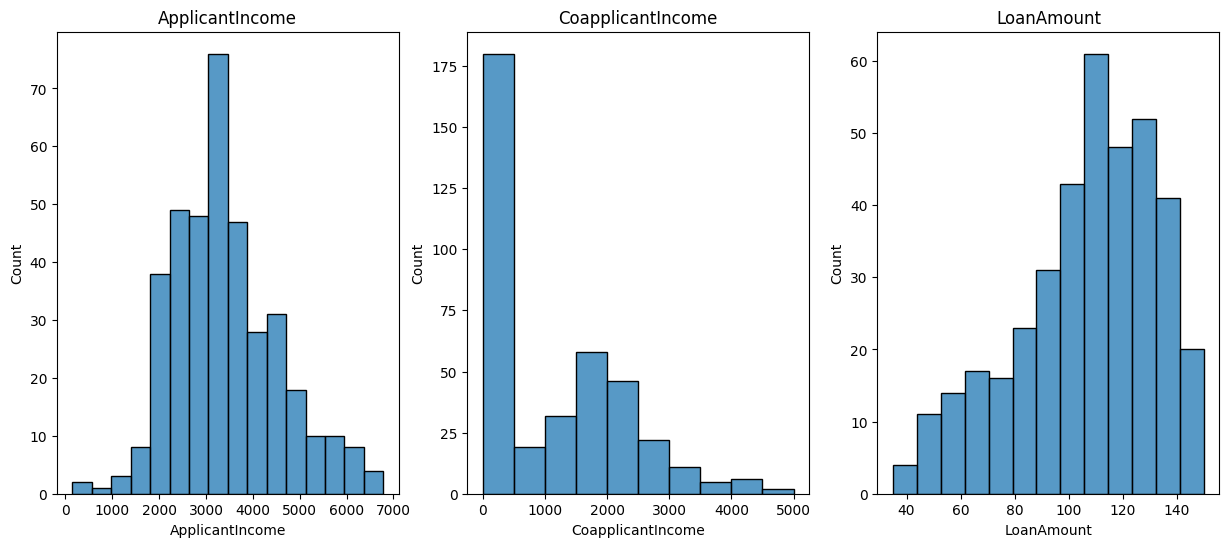

In [21]:
# 对哪些特征做标准化？
getHist(df[num_features],3)

In [22]:
# 实现标准化及极值归一化
from sklearn.preprocessing import StandardScaler,MinMaxScaler # 极值归一化

def normalization_feature(col,models=StandardScaler):
    '''
    该方法设计粒度为列，即针对某一个特征列的操作调用一次该方法
    models:特征缩放的方法，默认值为StandardScaler,可选其他参数为MinMaxScaler
    '''
    
    return models().fit_transform(col) # ndarray返回特征缩放后的结果

In [24]:
# 依次完成每一个数值型特征的特征缩放
for col in num_features:
    df[col] = normalization_feature(df[[col]])


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status-N,Loan_Status-Y
0,1,1,1,0,0,1.019596,0.357243,0.823726,8,1,0,1,0
1,1,1,0,0,1,-0.364040,-0.910879,-1.560840,8,1,2,0,1
2,1,1,0,1,0,-0.728522,1.072033,0.516040,8,1,2,0,1
3,1,0,0,0,0,2.258137,-0.910879,1.323716,8,1,2,0,1
4,1,1,0,1,0,-0.947037,0.363970,-0.445478,8,1,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,1,1,3,0,0,1.998542,-0.910879,0.823726,8,1,2,0,1
377,1,1,0,0,0,-0.161258,0.728934,0.054511,8,1,0,0,1
378,0,0,0,0,0,-0.451446,-0.910879,-1.368536,8,1,0,0,1
379,1,1,3,0,0,0.602669,-0.910879,-2.560819,5,1,0,0,1


当前数据集中所有的列为：['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
当前数据集中，列的数量为：3
当前构造的多图布局的形状为：(1, 3)
***当前获取到了第1个列，其名称为：ApplicantIncome
***当前列：ApplicantIncome要绘制的多图布局子区域的位置为：(0, 0)
***当前获取到了第2个列，其名称为：CoapplicantIncome
***当前列：CoapplicantIncome要绘制的多图布局子区域的位置为：(0, 1)
***当前获取到了第3个列，其名称为：LoanAmount
***当前列：LoanAmount要绘制的多图布局子区域的位置为：(0, 2)


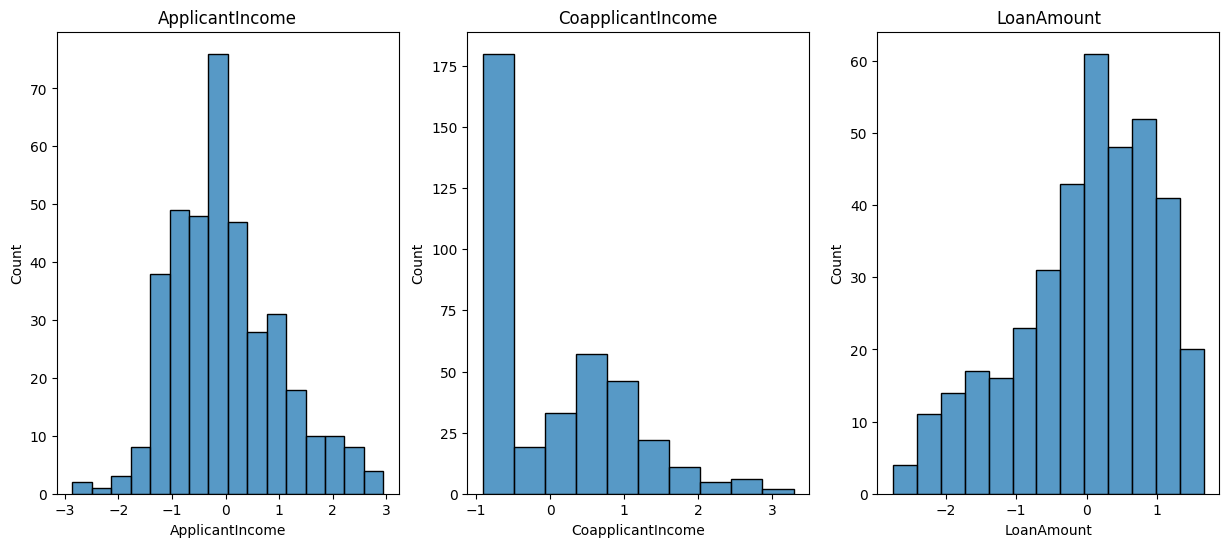

In [26]:
# 验证标准化结果
df

getHist(df[num_features],3)

In [23]:
# 极值归一化
# 依次完成每一个数值型特征的特征缩放
for col in num_features:
    df[col] = normalization_feature(df[[col]],models=MinMaxScaler)


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status-N,Loan_Status-Y
0,1,1,1,0,0,0.668325,0.3016,0.808696,8,1,0,1,0
1,1,1,0,0,1,0.429670,0.0000,0.269565,8,1,2,0,1
2,1,1,0,1,0,0.366802,0.4716,0.739130,8,1,2,0,1
3,1,0,0,0,0,0.881954,0.0000,0.921739,8,1,2,0,1
4,1,1,0,1,0,0.329112,0.3032,0.521739,8,1,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,1,1,3,0,0,0.837178,0.0000,0.808696,8,1,2,0,1
377,1,1,0,0,0,0.464646,0.3900,0.634783,8,1,0,0,1
378,0,0,0,0,0,0.414594,0.0000,0.313043,8,1,0,0,1
379,1,1,3,0,0,0.596412,0.0000,0.043478,5,1,0,0,1


当前数据集中所有的列为：['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
当前数据集中，列的数量为：3
当前构造的多图布局的形状为：(1, 3)
***当前获取到了第1个列，其名称为：ApplicantIncome
***当前列：ApplicantIncome要绘制的多图布局子区域的位置为：(0, 0)
***当前获取到了第2个列，其名称为：CoapplicantIncome
***当前列：CoapplicantIncome要绘制的多图布局子区域的位置为：(0, 1)
***当前获取到了第3个列，其名称为：LoanAmount
***当前列：LoanAmount要绘制的多图布局子区域的位置为：(0, 2)


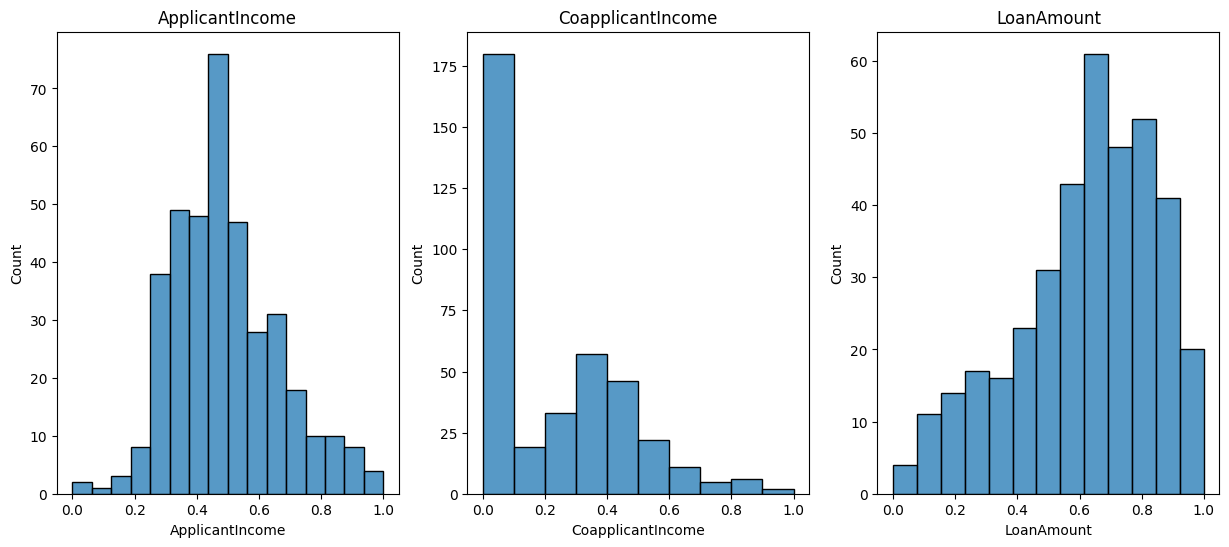

In [24]:
# 验证标准化结果
df

getHist(df[num_features],3)a